<a href="https://colab.research.google.com/github/ShashankViz/Titanic-Relevance-Analysis/blob/main/Titanic_Relevance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

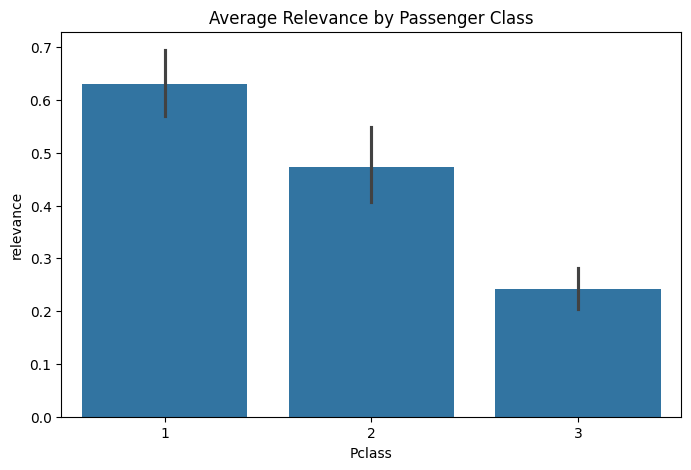

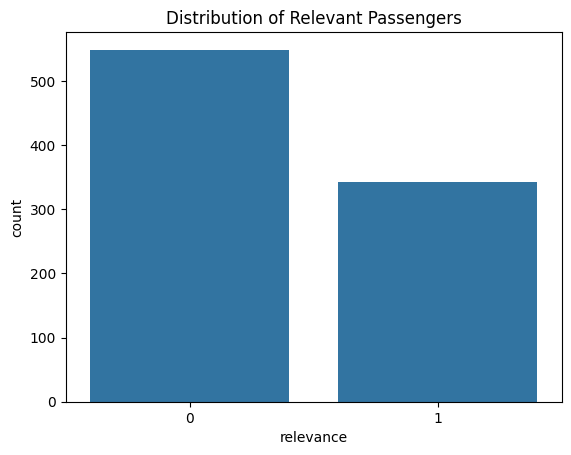

Accuracy: 0.81


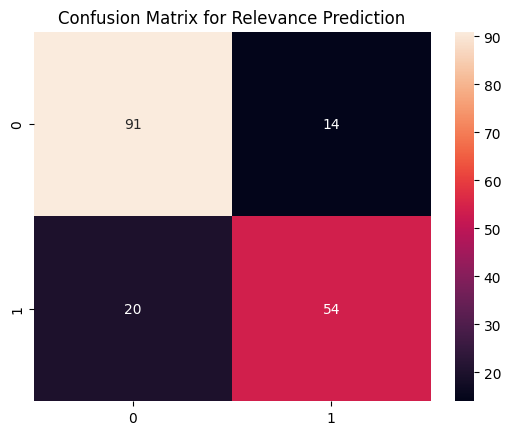

Predictions saved to submission.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
df = pd.read_csv('train.csv')

# Basic EDA
print(df.head())
print(df.info())

# Define "relevance" (using Survived as proxy)
df['relevance'] = df['Survived']  # 1 = relevant, 0 = not relevant

# Visualizations
# Relevance by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='relevance', data=df, estimator=np.mean)
plt.title('Average Relevance by Passenger Class')
plt.savefig('relevance_by_class.png')
plt.show()

# Relevance distribution
sns.countplot(x='relevance', data=df)
plt.title('Distribution of Relevant Passengers')
plt.savefig('relevance_distribution.png')
plt.show()

# Prepare data for modeling
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode gender
X = df[['Pclass', 'Sex', 'Age']].fillna(df['Age'].mean())  # Features, fill NaN in Age
y = df['relevance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Relevance Prediction')
plt.savefig('confusion_matrix.png')
plt.show()

# Save predictions for test set
test_df = pd.read_csv('test.csv')
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
X_test = test_df[['Pclass', 'Sex', 'Age']].fillna(test_df['Age'].mean())
test_df['predicted_relevance'] = model.predict(X_test)
submission = test_df[['PassengerId', 'predicted_relevance']]
submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")